In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pathlib

In [4]:
res = []
for out_file in pathlib.Path('./out').glob('*.out'):
    with open(out_file, 'rt') as f:
        content = f.read()
    i = content.find('maxAbsErr')
    if i == -1:
        # print(out_file)
        continue
    content = content[i:]
    d = {}
    for line in content.split('\n'):
        a= line.split('=')
        if len(a) == 1:
            continue
        k, v = a
        d[k] = v
    # print(d)
    del d['x']
    del d['u']
    del d['u_true']
    d['filename'] = str(out_file)
    d['block_sizes'] = np.asarray(list(map(int, d['block_sizes'].split())))
    res.append(d)
    # break

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(res)
assert np.all(df.Nx_global.astype(int) == df.block_sizes.apply(lambda x: np.sum(x)))
df = df.astype({
    'maxAbsErr': 'float',
    'size': 'int',
    'Nx_global': 'int',
    'Nt': 'int',
    'T': 'float',
    'tau': 'float',
    'h': 'float',
    'totalTime': 'float',
    'algo': 'str',
    'filename': 'str',
    'block_sizes': 'str'
})
display(df.dtypes)
with pd.option_context('display.max_rows', None):
    display(df.set_index(['algo', 'Nx_global', 'size']).sort_index())

maxAbsErr      float64
size             int64
Nx_global        int64
Nt               int64
T              float64
tau            float64
h              float64
totalTime      float64
algo            object
block_sizes     object
filename        object
dtype: object

maxAbsErr  Nt      T      tau        h  totalTime  \
algo Nx_global size                                                         
0    10000     1     4.682540e+23   5  0.001  0.00025  0.00010   0.000764   
               1     4.682540e+23   5  0.001  0.00025  0.00010   0.000754   
               1     4.682540e+23   5  0.001  0.00025  0.00010   0.000780   
               1     4.682540e+23   5  0.001  0.00025  0.00010   0.000743   
               1     4.682540e+23   5  0.001  0.00025  0.00010   0.000734   
               1     4.682540e+23   5  0.001  0.00025  0.00010   0.000704   
               1     4.682540e+23   5  0.001  0.00025  0.00010   0.000740   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.027623   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.000575   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.000765   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.000737   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.001192   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.013231   
               2     4.682540e+23   5  0.001  0.00025  0.00010   0.000469   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.000967   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.009511   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.008127   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.017517   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.000850   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.001357   
               4     4.682540e+23   5  0.001  0.00025  0.00010   0.006063   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.004670   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.015884   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.001348   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.008628   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.006553   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.013373   
               8     4.682540e+23   5  0.001  0.00025  0.00010   0.003105   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.000249   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.010602   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.014060   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.008278   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.012782   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.016015   
               16    4.682540e+23   5  0.001  0.00025  0.00010   0.010681   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.018863   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.023064   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.021139   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.013371   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.008029   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.005573   
               24    4.682540e+23   5  0.001  0.00025  0.00010   0.032197   
     25000     1     4.468520e+27   5  0.001  0.00025  0.00004   0.001875   
               1     4.468520e+27   5  0.001  0.00025  0.00004   0.001640   
               1     4.468520e+27   5  0.001  0.00025  0.00004   0.001669   
               1     4.468520e+27   5  0.001  0.00025  0.00004   0.001672   
               1     4.468520e+27   5  0.001  0.00025  0.00004   0.001664   
               1     4.468520e+27   5  0.001  0.00025  0.00004   0.001655   
               1     4.468520e+27   5  0.001  0.00025  0.00004   0.001949   
               2     4.468520e+27   5  0.001  0.00025  0.00004   0.011770   
               2    

/opt/software/python/anaconda/2024_02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/software/python/anaconda/2024_02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/software/python/anaconda/2024_02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/software/python/anaconda/2024_02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

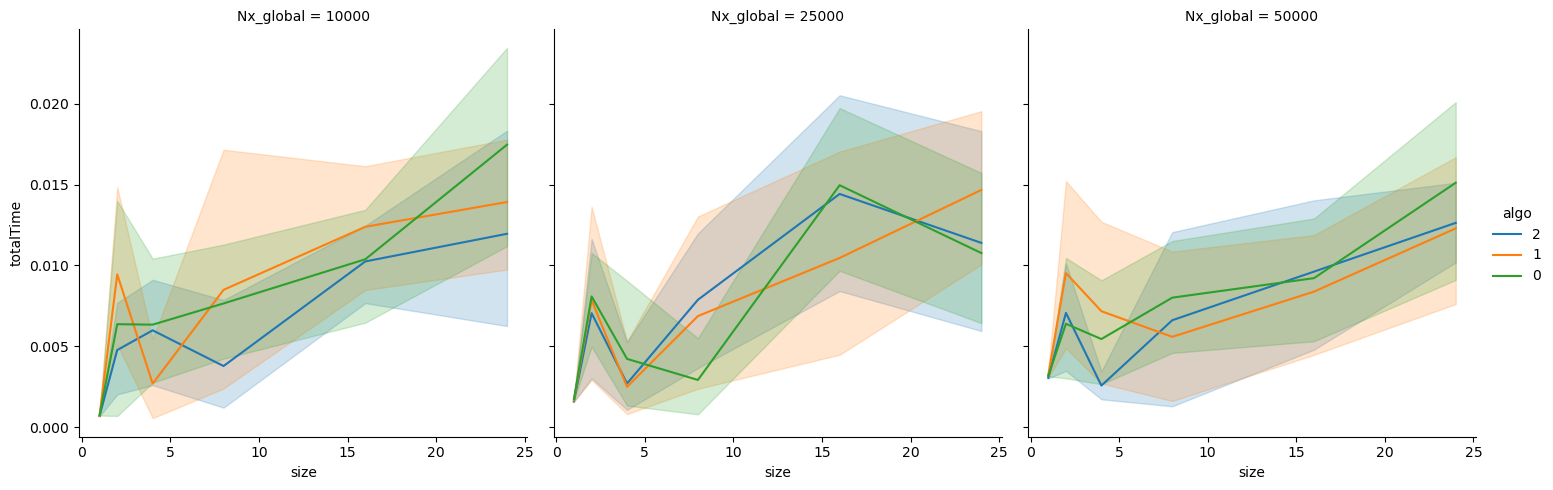

In [7]:
import seaborn as sns

sns.relplot(
    data=df,
    x='size',
    y='totalTime',
    col='Nx_global',
    hue='algo',
    kind='line',
)